In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Exercise 1

A publishing company has recently launched a new journal. In order to determine how effective it
is in reaching its possible audience, a market survey company selects a random sample of people
from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read
the last issue of the journal.

a) What kind of distribution would you assume for y, the number of people that have seen the last
issue of the yournal ?

b) Assuming a uniform prior, what is the posterior distribution for y ?

c) Plot both posterior and likelihood ditributions function

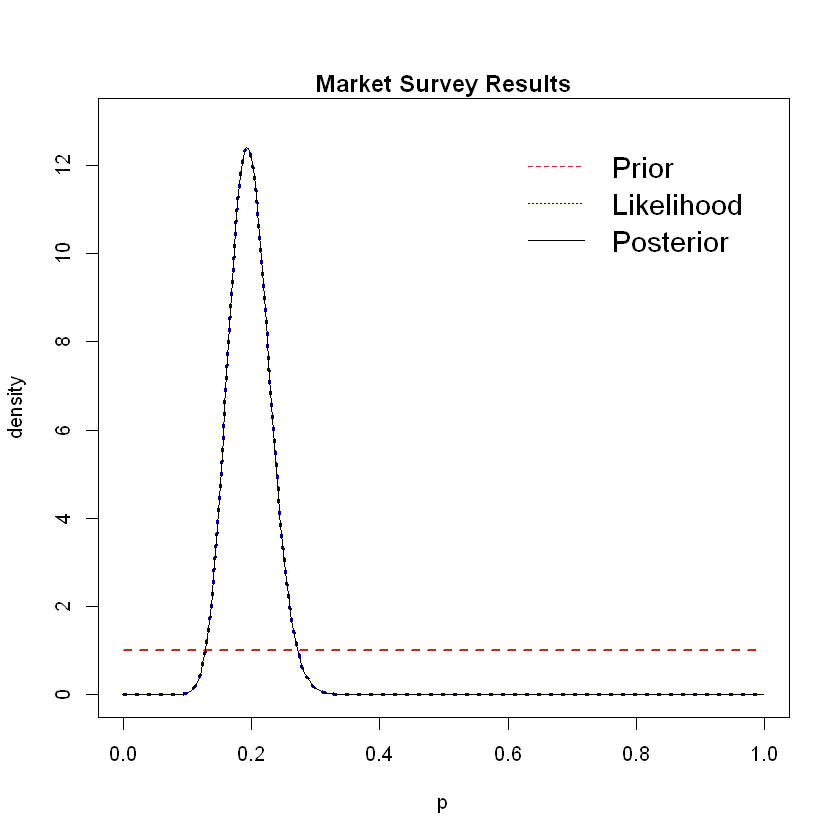

In [226]:
#binomial distribution because events are independant from each other and the only possible outcomes are yes or no
#uniform prior - use beta(1,1)
n.sample <- 350
n <- 150
alpha.prior <- 1
beta.prior <- 1
delta.p <- 1/n.sample

p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
n.seq <- seq.int(from=1,to=n)

#outcome of interviews
outcomes = c(rep(1,29),rep(0,150-29))
outcomes <- sample(outcomes) #shuffle

n <- length(outcomes)
r <- sum(str_count(outcomes, "1"))
x = seq(1,n,1)

p.betaprior <- dbeta(p, alpha.prior, beta.prior)
p.like <- dbinom(x=r, size=n, prob=p) 
p.like <- p.like/(delta.p*sum(p.like))
p.post <- dbeta(p, shape1 = alpha.prior + r, shape2 = beta.prior+n-r)
#p.mean.b <- delta.p*sum(p*p.post)


plot(p, p.betaprior, ylab = "density", type="l", col = "firebrick3", lwd=2, lty=2, ylim = c(0,13), cex=1.50)
lines(p, p.like, col = "navy", lty=3, lwd=2.5)
lines(p, p.post, lwd=0.5)
title(main="Market Survey Results", line=0.3, cex.main=1.2)
legend("topright", inset = .05, c("Prior","Likelihood","Posterior"),cex=1.45,col=c("firebrick3","navy","black"),lty=c(2,3,1), box.col="white")




## Exercise 2

Three students want to construct their prior probability about the proportion of residents that
support the building of a new concert hall in their small town.
Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.
Benny moved only recently to this new town and therefore he does non have the slightest idea about
it. Therefore he decides to use a uniform prior.
Chris believes that his prior should have a trapezoidal shape

$$ F(x)=   \left\{
\begin{array}{ll}
      20x &  0\leq x < 0.1 \\
      2 & 0.1\leq x < 0.3 \\
      5 − 10x & 0.3\leq x < 0.5 \\
      0 & x \leq 0.5 \\
\end{array} 
\right.  $$
a) Draw and compare the three prior distributions.
• The next day the three students decide to interview a sample of 100 citizens of the small town,
asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert
hall.

b) Evaluate and draw the three posterior distributions.

c) Give an estimate of the most probable value and the 95% credibility interval.

[1] "Alpha: 4.8 Beta: 19.2"

  [1] "0 likelihood"                     "4.2859224511628e-29 likelihood"  
  [3] "1.34648937390821e-21 likelihood"  "2.36885553006017e-17 likelihood" 
  [5] "1.93384326988199e-14 likelihood"  "2.92412535522058e-12 likelihood" 
  [7] "1.5169994049721e-10 likelihood"   "3.7511373935043e-09 likelihood"  
  [9] "5.37919639894124e-08 likelihood"  "5.07651473860407e-07 likelihood" 
 [11] "3.43696570934484e-06 likelihood"  "1.77517944577852e-05 likelihood" 
 [13] "7.31900086506157e-05 likelihood"  "0.000249302859265494 likelihood" 
 [15] "0.000720516843844471 likelihood"  "0.00180449054780061 likelihood"  
 [17] "0.00398302555055217 likelihood"   "0.00785618568552578 likelihood"  
 [19] "0.0140052619834316 likelihood"    "0.0227807159883239 likelihood"   
 [21] "0.0340799814911567 likelihood"    "0.0472081487045688 likelihood"   
 [23] "0.0609001092346445 likelihood"    "0.0735265642466096 likelihood"   
 [25] "0.0834335039431346 likelihood"    "0.0893104326083041 likelihood"   
 [27] "0.090

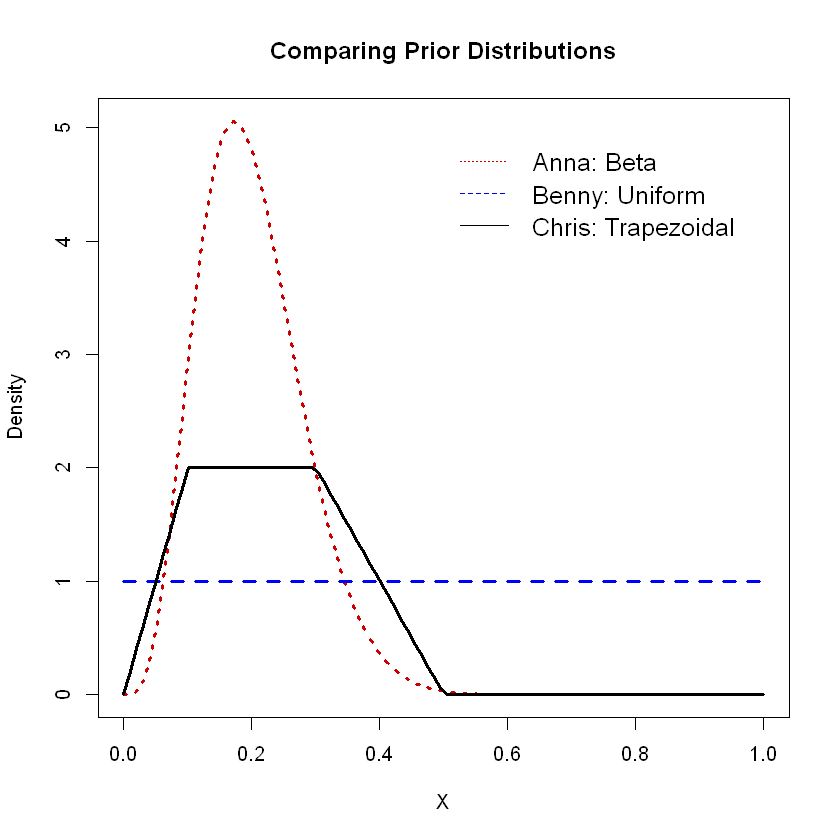

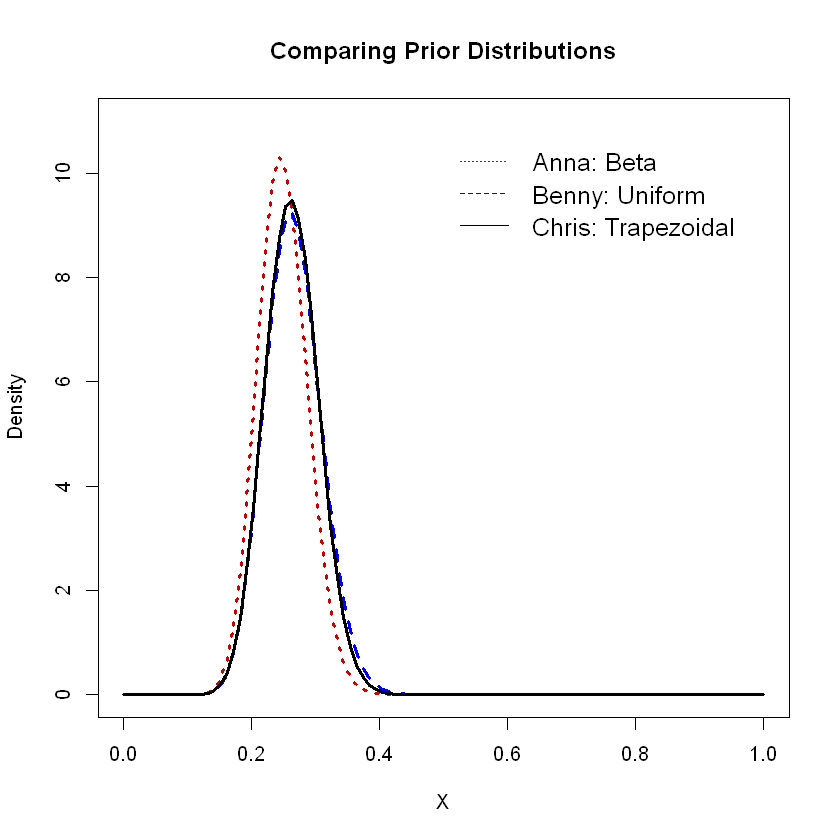

In [1]:
# estimate parameters of beta dist.
alpha_beta <- function(mu, sigma){
    alpha = mu**2 * ((1 - mu) / sigma**2 - 1 / mu)
    beta = alpha * (1 / mu - 1)
    return(paste("Alpha:", alpha, "Beta:", beta))
    }


alpha_beta(mu = 0.2, sigma = 0.08)

n.sample <- 100
x <- seq(from=0, to=1, length.out = n.sample)

anna.prior <- dbeta(x, 4.8, 19.2)
benny.prior <- dunif(x,0,1)

chris_dist <- function(z) {
    if (0 <= z && z < 0.1)
        r = 20*z
    if (0.1 <= z && z < 0.3)
        r = 2
    if (0.3 <= z && z < 0.5)
        r = 5-10*z
    if (z >= 0.5) 
        r = 0
    return(r)
    }

chris.prior <- Vectorize(chris_dist)(x)

plot(x, anna.prior, type="l", col = "red3", lty=3, ylab="Density", xlab="X", main="Comparing Prior Distributions", lwd = "2.5")
lines(x, benny.prior, col = "blue", lty=2, lwd = "2.5")
lines(x, chris.prior, lwd = "2.5")
legend("topright", inset = .05, c("Anna: Beta","Benny: Uniform","Chris: Trapezoidal"),cex=1.25,col=c("red3","blue","black"),lty=c(3,2,1), box.col="white")

#evaluate posteriors
#results
n <- 100
r <- 26
results <- c(rep(1,26),rep(0,100-26))
results <- sample(results) #shuffle


anna.post <- dbeta(x, shape1 = 4.8+r, shape2 = 19.2+n-r)
#binom likelihood because all people are independant and their opinions have the same probability (because we have no extra data)

delta.p <- 1/n.sample
likelihood <- dbinom(x=r, size=n, prob=x)
print(paste(likelihood, "likelihood"))

benny.post <- likelihood/(delta.p*sum(likelihood))
#normalise
chris.post <- function(chris.prior) { #change all data
    
    post <- chris.prior * likelihood
    post.norm <- post/(delta.p*sum(post))
    return(post.norm)
    
}

plot(x, anna.post, type="l", col = "red3", lty=3, ylab="Density", xlab="X", main="Comparing Prior Distributions", lwd = "2.5",
    ylim = c(0,11))
lines(x, benny.post, col = "blue", lty=2, lwd = "2.5")
lines(x, chris.post(chris.prior), lwd = "2.5")
legend("topright", inset = .05, c("Anna: Beta","Benny: Uniform","Chris: Trapezoidal"),cex=1.25,col=c("red3","blue","black"),lty=c(3,2,1), box.col="white")



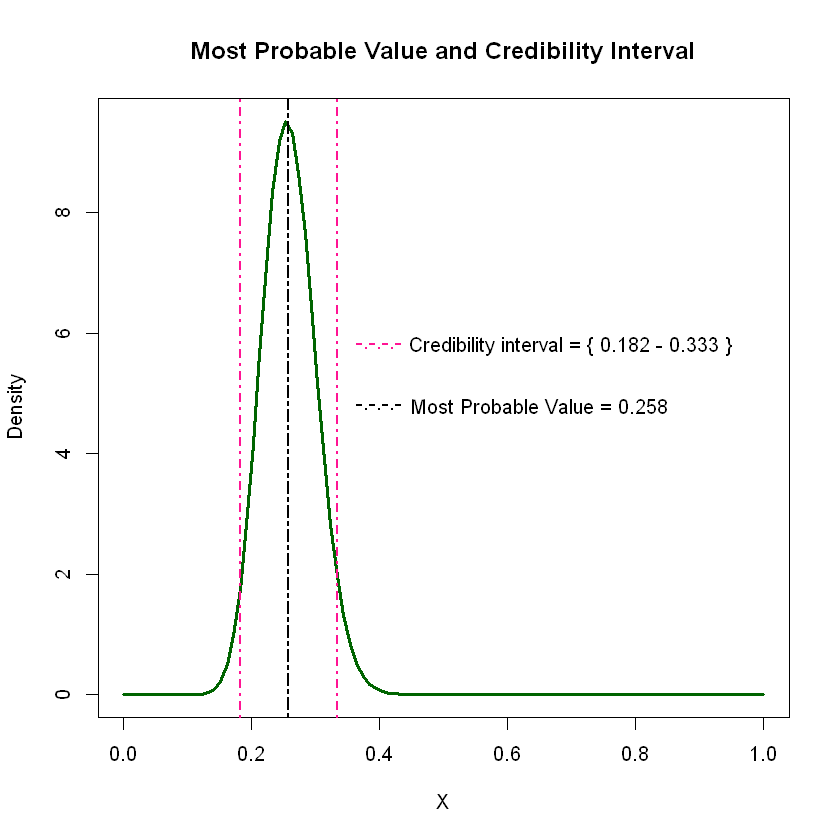

In [145]:
#average the three different posteriors to find estimate of most probable value
pdf_averaged <- (anna.post + benny.post + chris.post(chris.prior))/3
plot(x, pdf_averaged, lwd = "2.5", type = "l", ylab = "Density",
    xlab = "X", col = "darkgreen", main = "Most Probable Value and Credibility Interval")
pdf.mean <- delta.p*sum(x*pdf_averaged)
abline(v=pdf.mean, lwd = "2", lty = 6)

integrals <- cumsum(pdf_averaged)/sum(pdf_averaged)
abline(v = x[which(integrals >= 0.025)[1]], col = "deeppink", lty=4, lwd=2)
abline(v = x[which(integrals >= 0.975)[1]-1], col = "deeppink", lty=4, lwd=2)
#credibility interval text
text(x=0.4,y=5.8, cex = 1.0, "-.-.-.-", col = "deeppink")
text(x=0.7,y=5.8, cex = 1.0, paste("Credibility interval = {", round(x[which(integrals >= 0.025)[1]], digits = 3), "-", round(x[which(integrals >= 0.975)[1]-1], digits = 3), "}"))
#most probable value
text(x=0.4,y=4.8, cex = 1.0, "-.-.-.-", col = "black")
text(x=0.65,y=4.8, cex = 1.0, paste("Most Probable Value =", round(pdf.mean, digits = 3)))



## Exercise 3

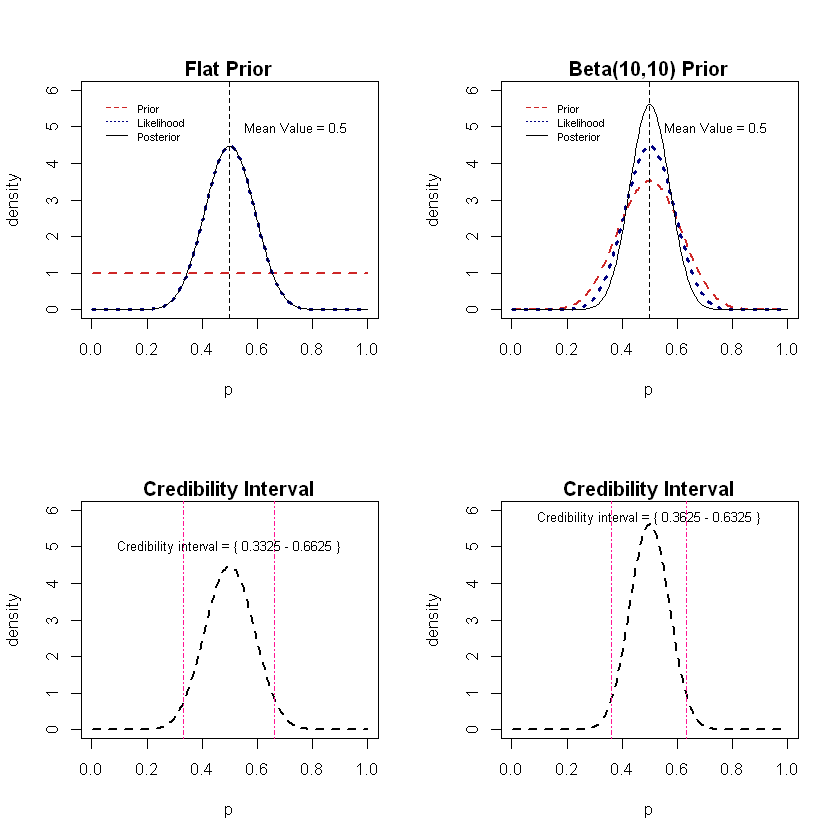

In [45]:
#plot the likelihood, prior and posterior distributions for the dataset
#flat prior beta(1,1)

n <- 30
n.sample <- 200
alpha.prior <- 1
beta.prior <- 1
delta.p <- 1/n.sample

par(mfrow = c(2,2))
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
n.seq <- seq.int(from=1,to=n)

#outcome of coin toss
outcomes = c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")


r <- sum(str_count(outcomes, "T"))
p.betaprior <- dbeta(x=p, alpha.prior, beta.prior)
p.like <- dbinom(x=r, size=n, prob=p)
p.like <- p.like/(delta.p*sum(p.like))
p.post <- dbeta(x=p, shape1 = alpha.prior + r, shape2 = beta.prior+n-r)
p.mean.b <- delta.p*sum(p*p.post)


plot(p, p.betaprior, ylab = "density", type="l", col = "firebrick3", lwd=2, ylim = c(0,6), lty=2)
lines(p, p.like, col = "navy", lty=3, lwd=2.5)
lines(p, p.post, lwd=0.5)
abline(v=p.mean.b, lty=2)
text(x=0.74,y=5, paste("Mean Value =", p.mean.b), cex=.8)
title(main="Flat Prior", line=0.3, cex.main=1.2)
legend("topleft", inset = .05, c("Prior","Likelihood","Posterior"),cex=.65,col=c("firebrick3","navy","black"),lty=c(2,3,1), box.col="white")

#beta prior alpha = 10, beta = 10
alpha.prior <- 10
beta.prior <- 10

p.betaprior <- dbeta(x=p, alpha.prior, beta.prior)
p.like <- dbinom(x=r, size=n, prob=p)
p.like <- p.like/(delta.p*sum(p.like))
p.post <- dbeta(x=p, shape1 = alpha.prior + r, shape2 = beta.prior+n-r)

plot(p, p.betaprior, ylab = "density", type="l", col = "firebrick3", lwd=2, ylim = c(0,6), lty=2)
lines(p, p.like, col = "navy", lty=3, lwd=2.5)
lines(p, p.post, lwd=0.5)
abline(v=p.mean.b, lty=2)
text(x=0.74,y=5, paste("Mean Value =", p.mean.b), cex=.8)
title(main="Beta(10,10) Prior", line=0.3, cex.main=1.2)
legend("topleft", inset = .05, c("Prior","Likelihood","Posterior"),cex=.65,col=c("firebrick3","navy","black"),lty=c(2,3,1), box.col="white")

#evaluate the most probable value for the coin probability p and, integrating the posterior probability
#distribution, give an estimate for a 95% credibility interval

centre <- p.mean.b


plot(p, dbeta(x=p, shape1 = 1 + r, shape2 = 1+n-r), ylab = "density", type="l", col = "black", lwd=2, ylim = c(0,6), lty=2)
integral <- (dbeta(p, shape1 = 1 + r, shape2 = 1+n-r))
integrals <- cumsum(integral)/sum(integral)
abline(v = p[which(integrals >= 0.025)[1]], col = "deeppink", lty=4)
abline(v = p[which(integrals >= 0.975)[1]-1], col = "deeppink", lty=4)
text(x=0.5,y=5, cex = .8, paste("Credibility interval = {", p[which(integrals >= 0.025)[1]], "-", p[which(integrals >= 0.975)[1]-1], "}"))
title(main="Credibility Interval", line=0.3, cex.main=1.2)


plot(p, dbeta(x=p, shape1 = 10 + r, shape2 = 10+n-r), ylab = "density", type="l", col = "black", lwd=2, ylim = c(0,6), lty=2)
integral_2 <- (dbeta(p, shape1 = 10 + r, shape2 = 10+n-r))
integrals <- cumsum(integral_2)/sum(integral_2)
abline(v = p[which(integrals >= 0.025)[1]], col = "deeppink", lty=4)
abline(v = p[which(integrals >= 0.975)[1]-1], col = "deeppink", lty=4)
text(x=0.5,y=5.8, cex = .8, paste("Credibility interval = {", p[which(integrals >= 0.025)[1]], "-", p[which(integrals >= 0.975)[1]-1], "}"))
title(main="Credibility Interval", line=0.3, cex.main=1.2)




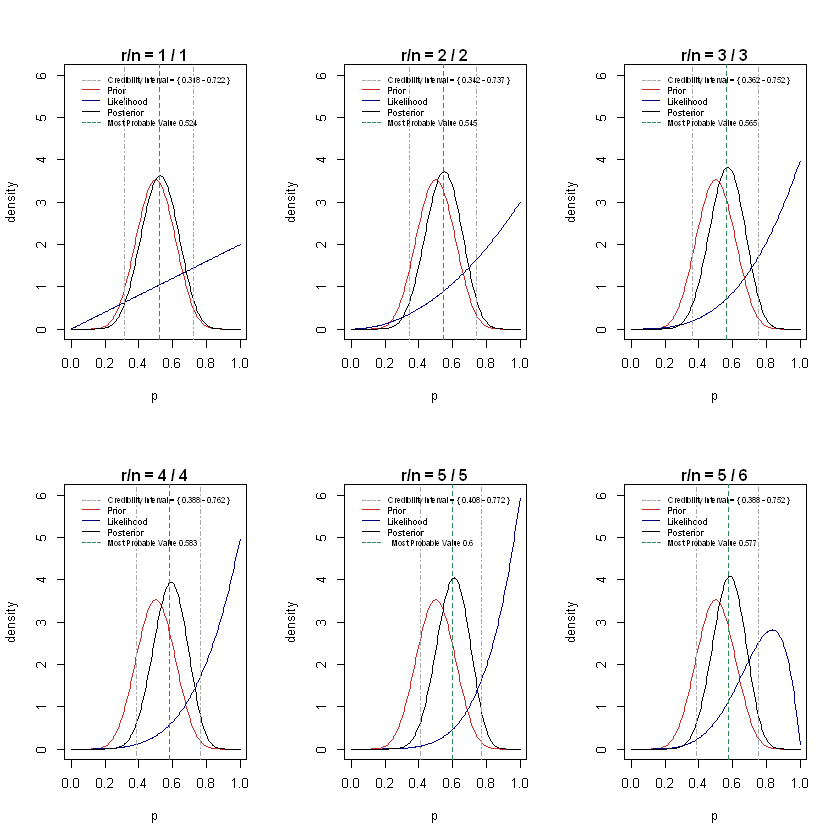

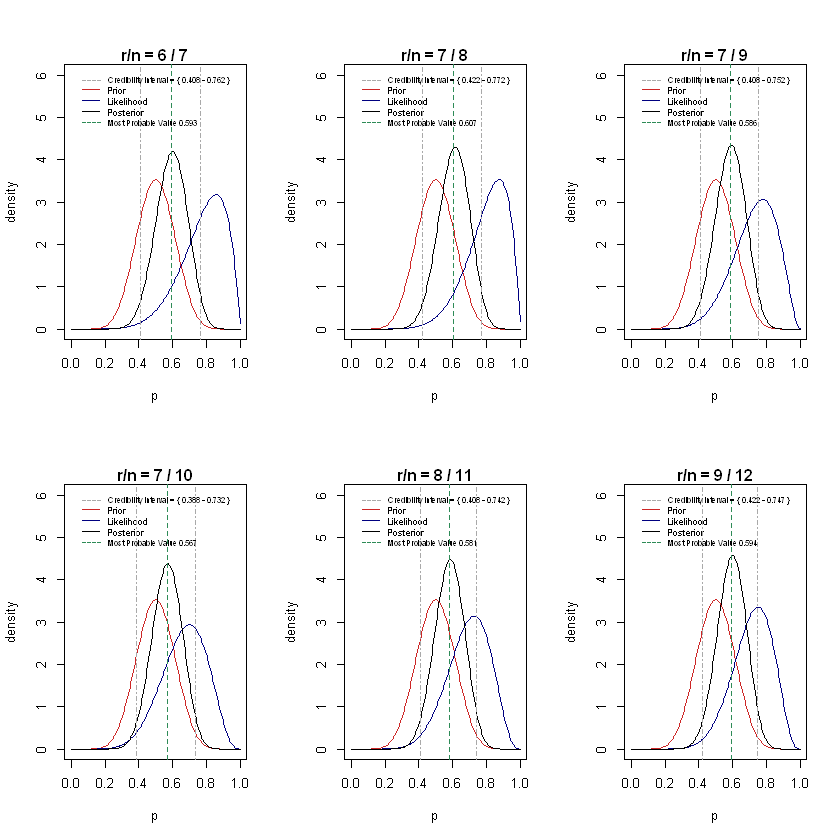

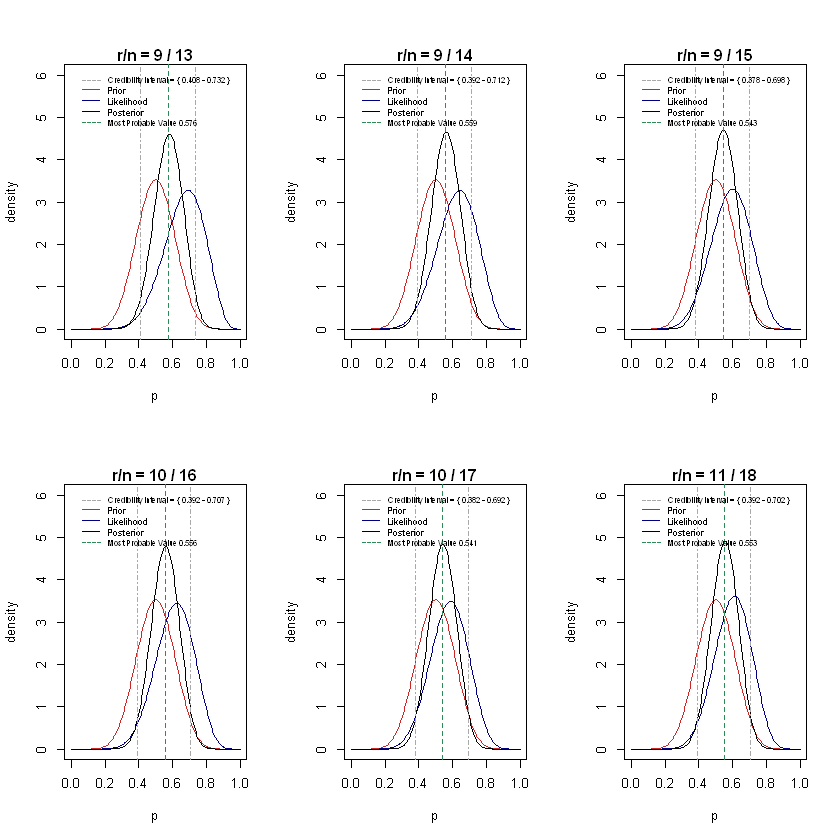

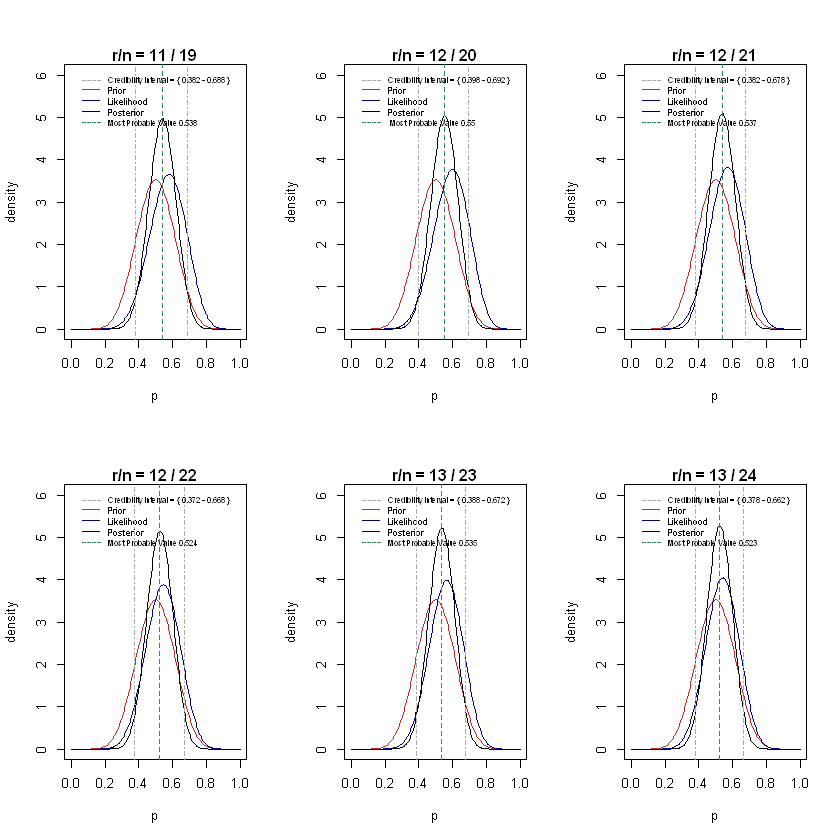

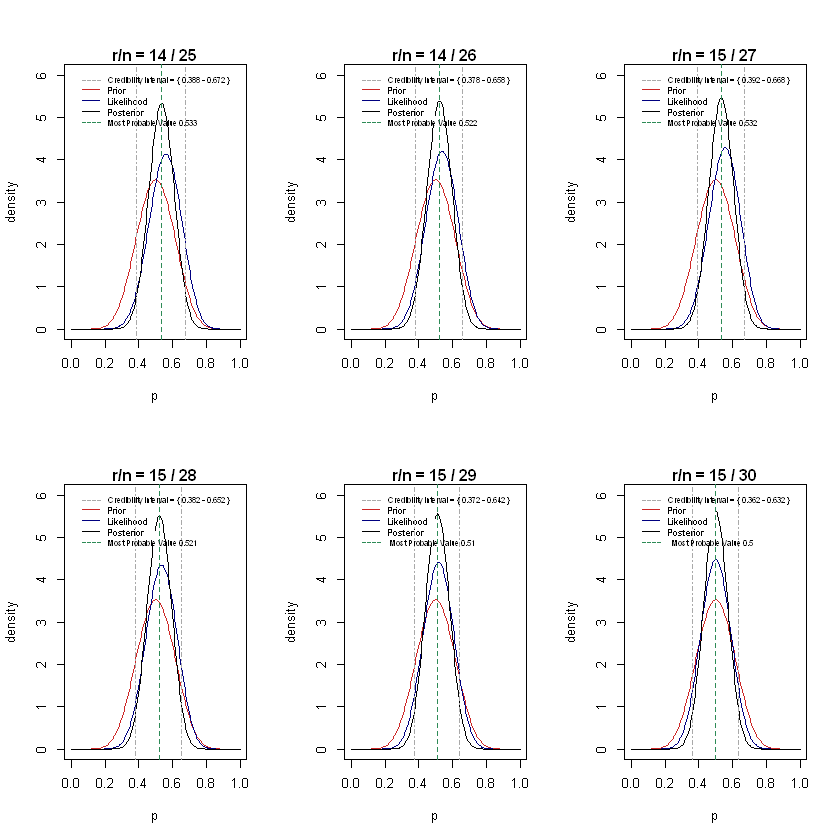

In [210]:
#beta prior w params alpha and beta
n <- 30
n.sample <- 200
alpha.prior <- 10
beta.prior <- 10
delta.p <- 1/n.sample

par(mfrow = c(2,3))
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
n.seq <- seq.int(from=1,to=n, by=1)

#outcome of coin toss
outcomes = c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")

for (n in n.seq){

r <- sum(str_count(outcomes[0:n], "T"))
p.betaprior <- dbeta(x=p, alpha.prior, beta.prior)
p.like <- dbinom(x=r, size=n, prob=p)
p.like <- p.like/(delta.p*sum(p.like))
p.post <- dbeta(x=p, shape1 = alpha.prior + r, shape2 = beta.prior+n-r)

plot(p, p.betaprior, ylab = "density", type="l", col = "firebrick3", ylim = c(0,6))
lines(p, p.like, col = "navy")
lines(p, p.post, lwd=1.5)
title(main=paste("r/n =",r,"/",n), line=0.3, cex.main=1.2)
legend("topleft", inset = .05, c("Prior","Likelihood","Posterior"),cex=.65,col=c("firebrick3","navy","black"), 
       box.col="white", lty = c(1,1,1))


integrals <- cumsum(p.post)/sum(p.post)
abline(v = p[which(integrals >= 0.025)[1]], col = "darkgrey", lty=4, lwd=0.08)

abline(v = p[which(integrals >= 0.975)[1]-1], col = "darkgrey", lty=4, lwd=0.08)
    
p.mean <- delta.p*sum(p*p.post)
abline(v = p.mean, lty=2, col = "seagreen")
    

text(x=0.58,y=5.9, cex = .6, paste("Credibility interval = {", round(p[which(integrals >= 0.025)[1]], 3), "-", round(p[which(integrals >= 0.975)[1]-1], 3), "}"))
text(x=0.125,y=5.9, cex = 1.2, "----", col = "darkgrey")

text(x=0.48,y=4.9, cex = .6, paste("Most Probable Value", round(p.mean, 3)))
text(x=0.125,y=4.9, cex = 1.2, "----", col = "seagreen")
  
}





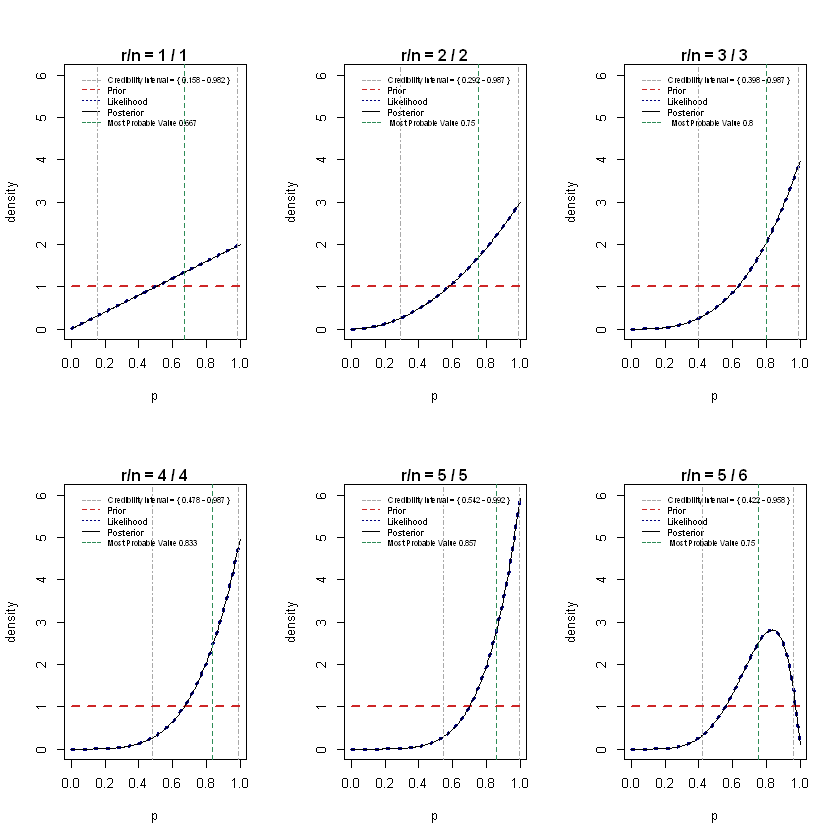

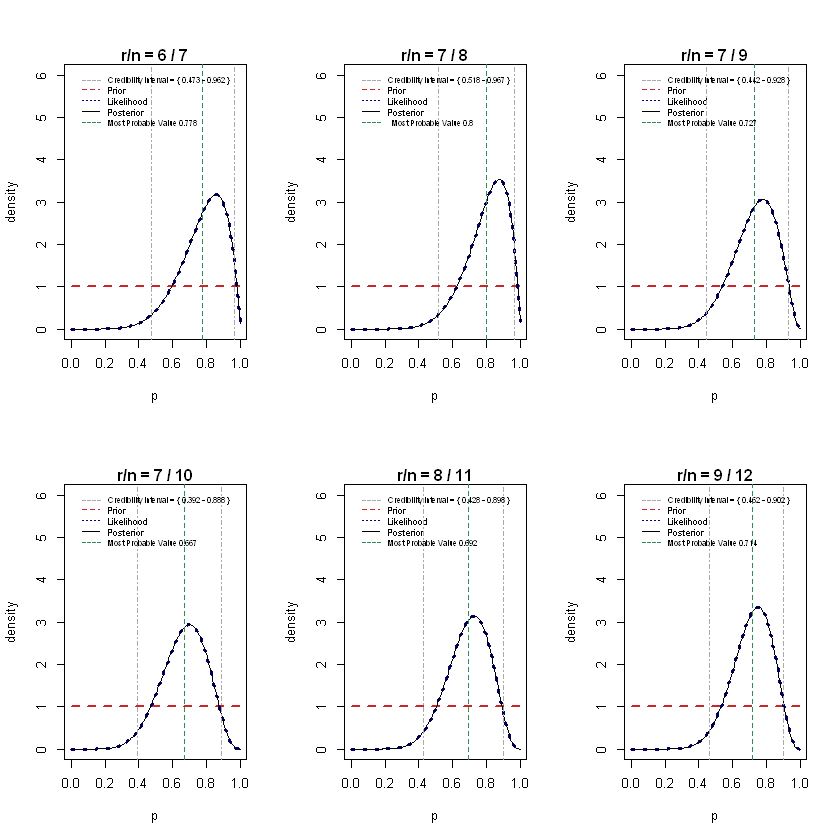

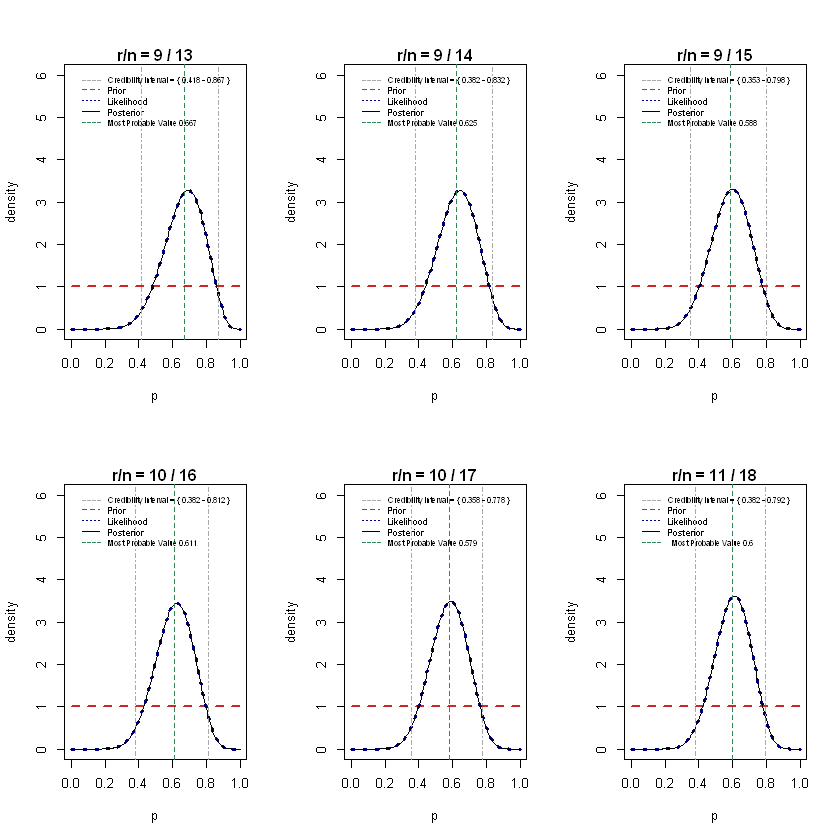

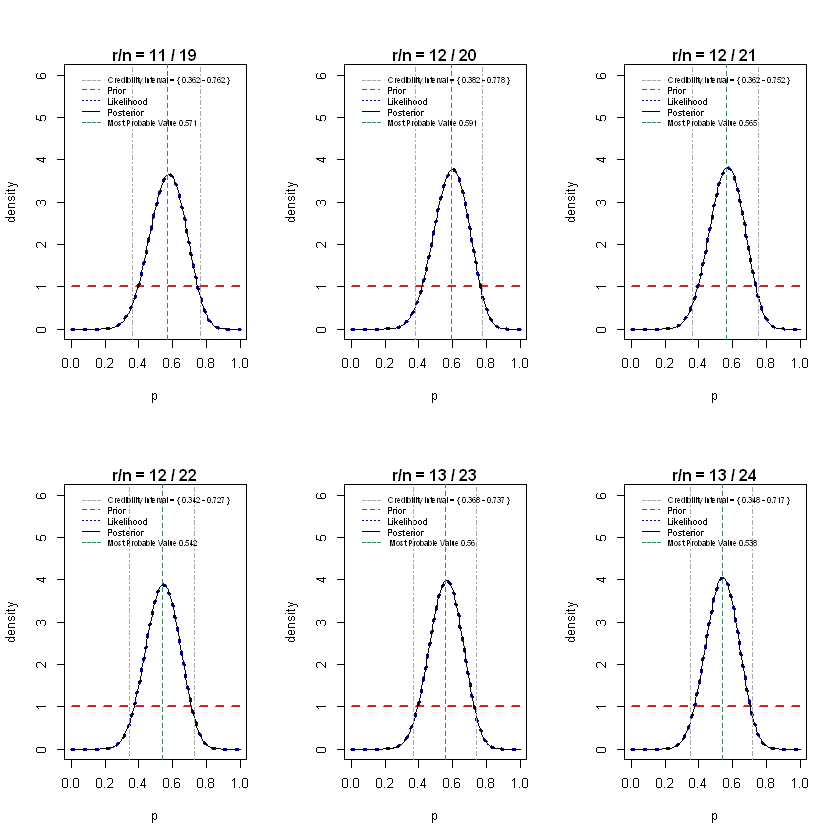

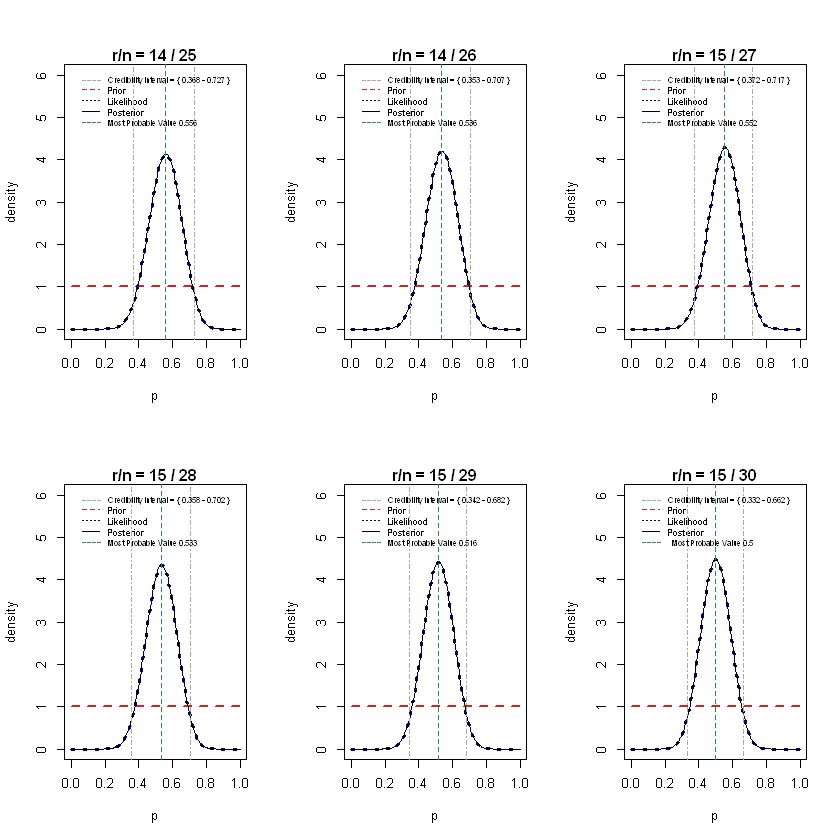

In [211]:
#flat prior
n <- 30;
flat.prior <- 30
n.sample <- 200
delta.p <- 1/n.sample

#beta prior w params alpha and beta
n <- 30
n.sample <- 200
alpha.prior <- 1
beta.prior <- 1
delta.p <- 1/n.sample

par(mfrow = c(2,3))
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
n.seq <- seq.int(from=1,to=n)

#outcome of coin toss
outcomes = c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")

for (n in n.seq){

r <- sum(str_count(outcomes[0:n], "T"))
p.betaprior <- dbeta(x=p, alpha.prior, beta.prior)
p.like <- dbinom(x=r, size=n, prob=p)
#print(p.like)
p.like <- p.like/(delta.p*sum(p.like))
#print(p.like)
p.post <- dbeta(x=p, shape1 = alpha.prior + r, shape2 = beta.prior+n-r)

plot(p, p.betaprior, ylab = "density", type="l", col = "firebrick3", lwd=2, ylim = c(0,6), lty=2)
lines(p, p.like, col = "navy", lty=3, lwd=3)
lines(p, p.post, lwd=1.5)
title(main=paste("r/n =",r,"/",n), line=0.3, cex.main=1.2)
legend("topleft", inset = .05, c("Prior","Likelihood","Posterior"),cex=.65,col=c("firebrick3","navy","black"),lty=c(2,3,1), box.col="white")


integrals <- cumsum(p.post)/sum(p.post)
abline(v = p[which(integrals >= 0.025)[1]], col = "darkgrey", lty=4, lwd=0.08)

abline(v = p[which(integrals >= 0.975)[1]-1], col = "darkgrey", lty=4, lwd=0.08)
    
p.mean <- delta.p*sum(p*p.post)
abline(v = p.mean, lty=2, col = "seagreen")


text(x=0.58,y=5.9, cex = .6, paste("Credibility interval = {", round(p[which(integrals >= 0.025)[1]], 3), "-", round(p[which(integrals >= 0.975)[1]-1], 3), "}"))
text(x=0.125,y=5.9, cex = 1.2, "----", col = "darkgrey")

text(x=0.48,y=4.9, cex = .6, paste("Most Probable Value", round(p.mean, 3)))
text(x=0.125,y=4.9, cex = 1.2, "----", col = "seagreen")

}

#likelihood and posterior are the same as posterior did not have any extra information from the prior



